<a href="https://colab.research.google.com/github/junaiskv94/Cardiovascular-Risk-Prediction/blob/main/cardiovascular_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Cardivascular Risk Prediction**
# **Problem Description**
The data comes from an ongoing cardiovascular study of people living in the Massachusetts town of Framingham. The classification objective is to identify a patient's 10-year risk of developing coronary heart disease (CHD). Information about the patients is provided by the dataset.

# **Data Description**
It has 15 features and nearly 4,000 recordings. Variables Each attribute has the potential to be a risk factor. The risk factors might be medical, behavioural, or demographic.


Data Description
Demographic:
• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)
Predict variable (desired target)

**Dependent Variable: 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)** 


# **Importing Libraries and Loading the data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline

from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

In [2]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load data
data = pd.read_csv("/content/drive/MyDrive/capstone_project/3-Cardiovascular Risk prediction/data_cardiovascular_risk.csv")

In [4]:
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
data.shape

(3390, 17)

# Data Preprocessing

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

Checking for Null values

In [7]:
# Missing Value Count Function
def show_missing():
    missing = data.columns[data.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(data[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(data[show_missing()].isnull().sum().sort_values(ascending = False)/len(data)*100,2))

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


In [8]:
#imputing education and BPMeds columns with mode
data['education'] = data['education'].fillna(data['education'].mode()[0])
data['BPMeds'] = data['BPMeds'].fillna(data['BPMeds'].mode()[0])

#imputing glucose,totChol,BMI and heartRate columns with median
data['glucose'] = data['glucose'].fillna(data['glucose'].median())
data['totChol'] = data['totChol'].fillna(data['totChol'].median())
data['BMI'] = data['BMI'].fillna(data['BMI'].median())
data['heartRate'] = data['heartRate'].fillna(data['heartRate'].median())
data['cigsPerDay'] = data['cigsPerDay'].fillna(data['heartRate'].median())

In [9]:
# change in to int 
data['BPMeds']=data['BPMeds'].astype('int')
data['education']=data['education'].astype('int')

#Exploratory Data Analysis

Exploring the dependent variable

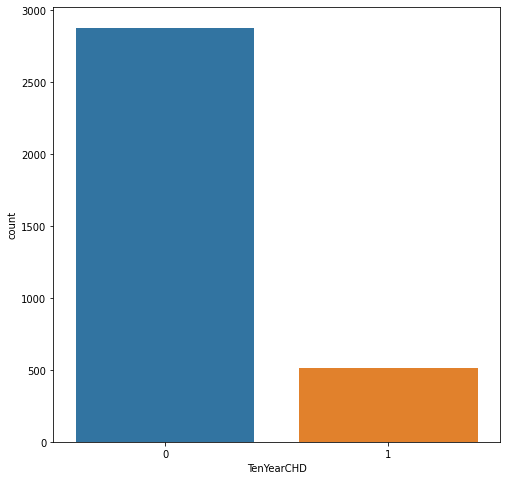

In [10]:
sns.countplot(x=data['TenYearCHD'])

In [11]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 2 categorical variables


In [12]:
# find Numerical variables
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 15 numerical variables


In [13]:
# finding discrete variable
discrete = []
for var in numerical:
    if len(data[var].unique())<20:
        print(var, ' values: ', data[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

education  values:  [2 4 1 3]
BPMeds  values:  [0 1]
prevalentStroke  values:  [0 1]
prevalentHyp  values:  [0 1]
diabetes  values:  [0 1]
TenYearCHD  values:  [1 0]
There are 6 discrete variables


In [14]:
# continuous variable
continuous = [var for var in numerical if var not in discrete and var not in ['id']]
continuous

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


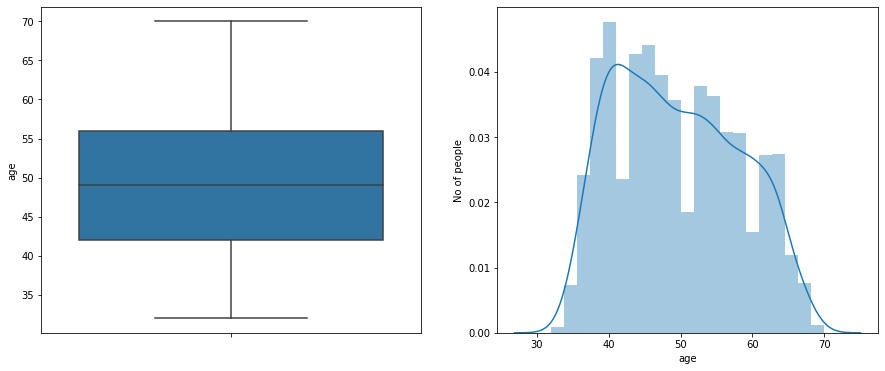

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


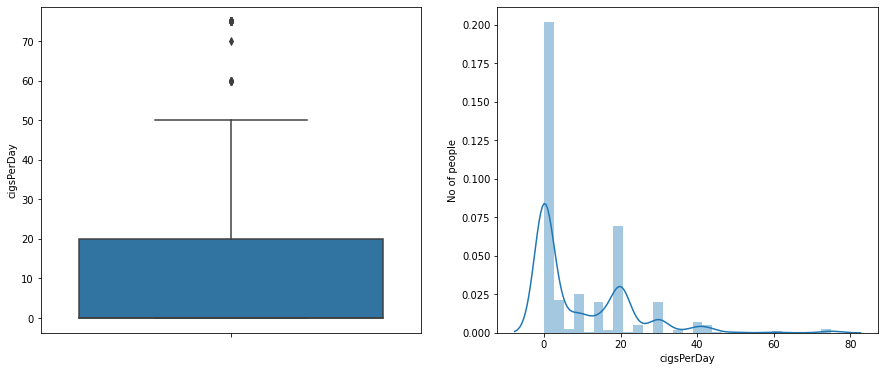

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


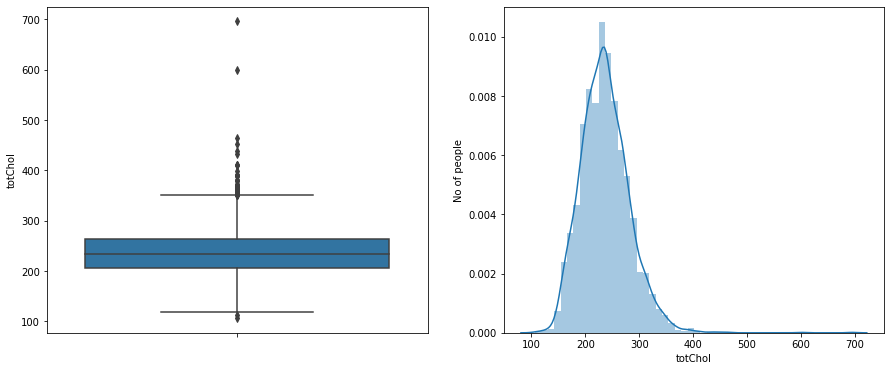

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


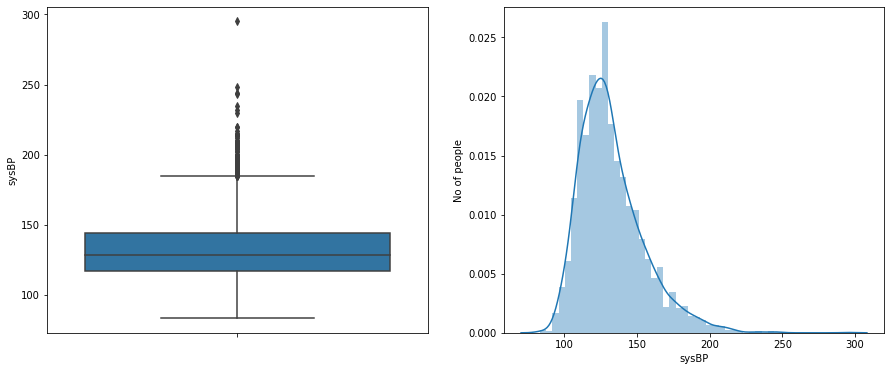

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


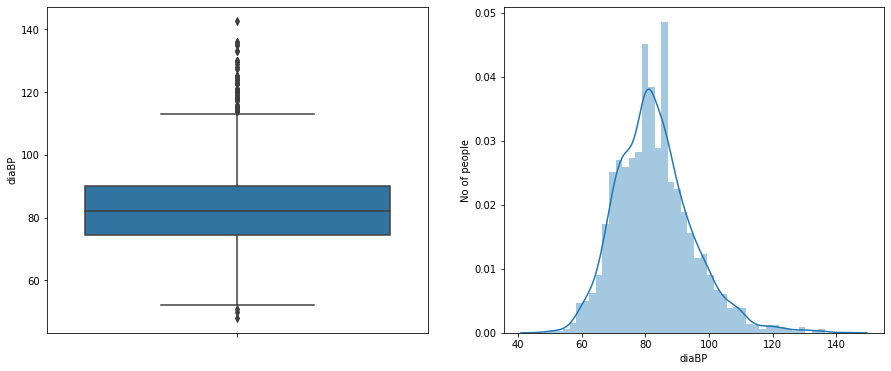

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


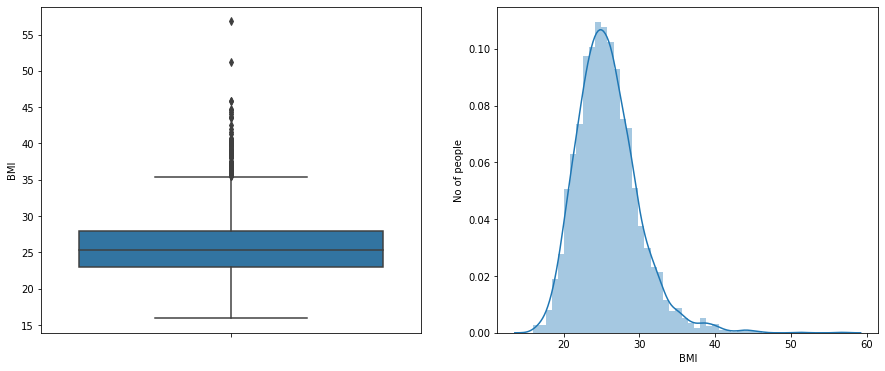

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


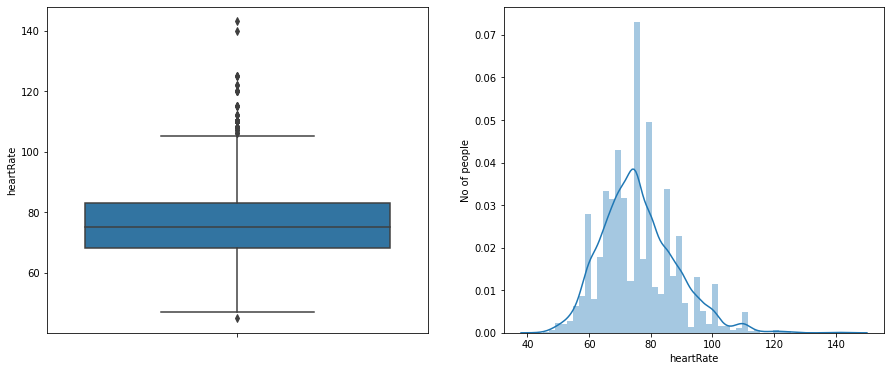

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


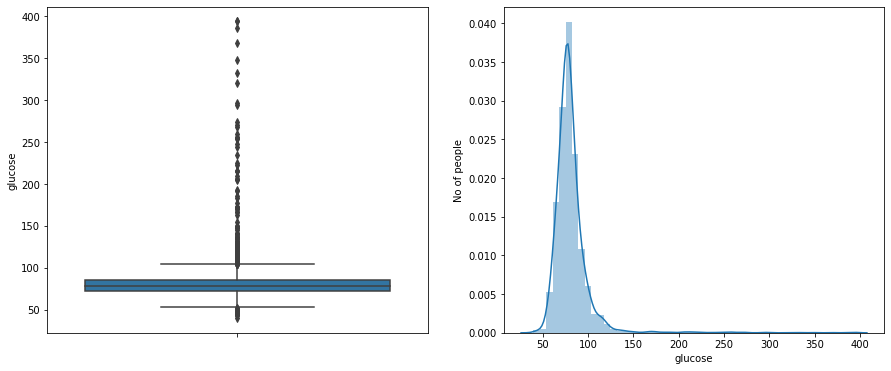

In [15]:
# plot continous variable
for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=data[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(data[var].dropna())
    fig.set_ylabel('No of people')
    fig.set_xlabel(var)

    plt.show()

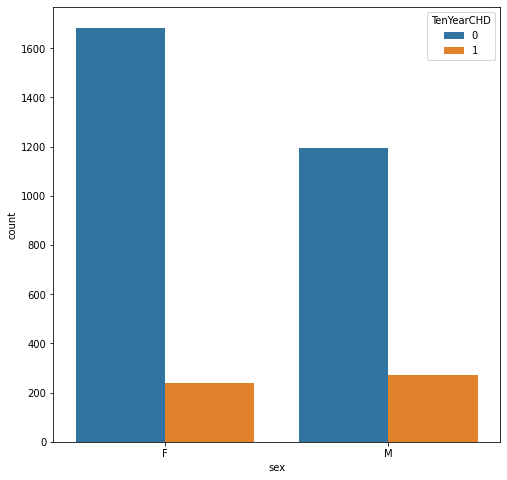

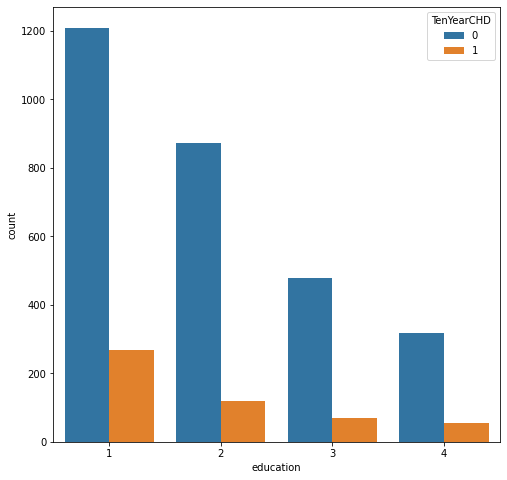

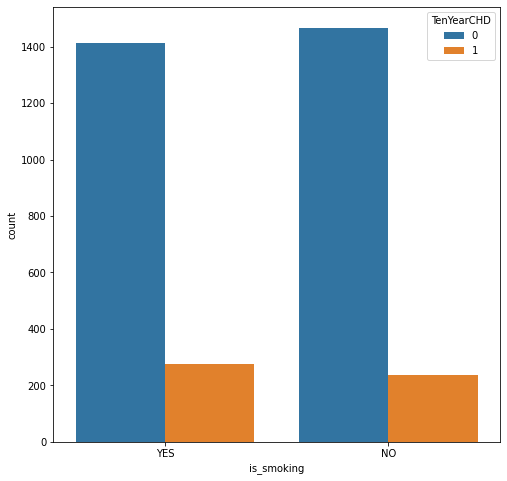

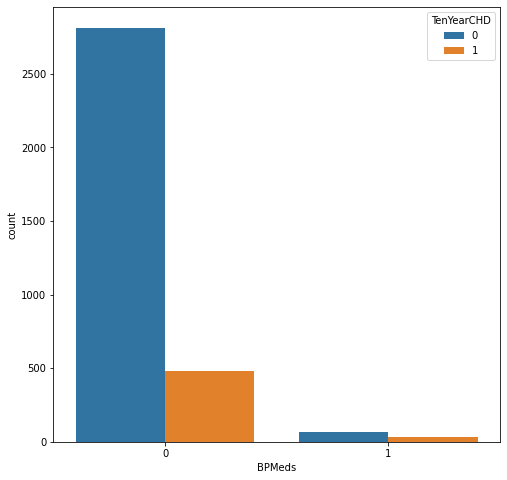

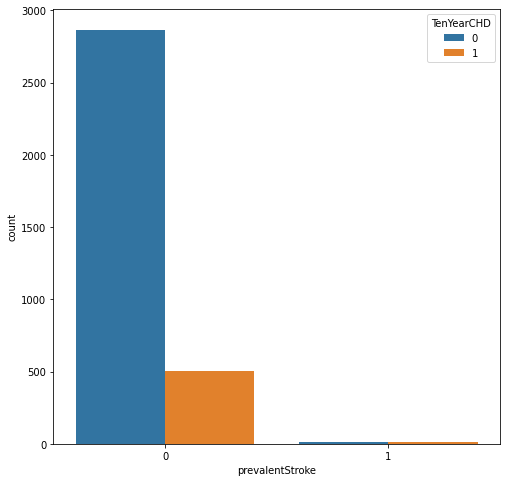

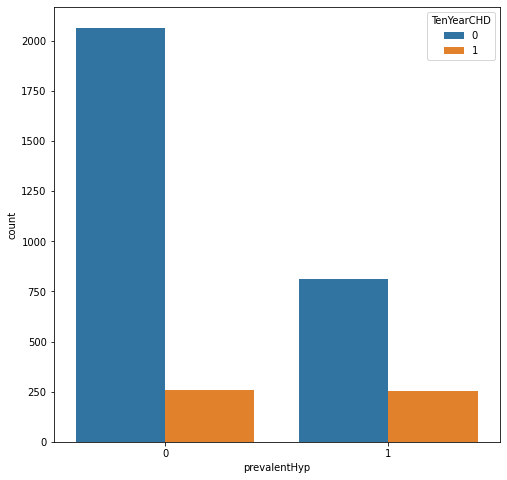

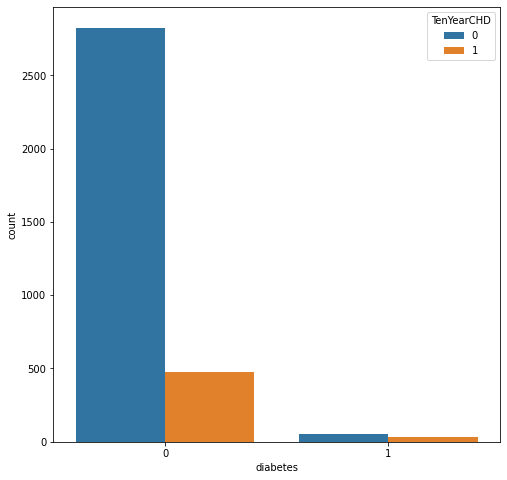

In [16]:
# categorial values
sns.countplot(x='sex', data=data, hue='TenYearCHD')
plt.show()
sns.countplot(x='education', data=data, hue='TenYearCHD')
plt.show()
sns.countplot(x='is_smoking', data=data, hue='TenYearCHD')
plt.show()
sns.countplot(x='BPMeds', data=data, hue='TenYearCHD')
plt.show()
sns.countplot(x='prevalentStroke', data=data, hue='TenYearCHD')
plt.show()
sns.countplot(x='prevalentHyp', data=data, hue='TenYearCHD')
plt.show()
sns.countplot(x='diabetes', data=data, hue='TenYearCHD')
plt.show()

In [17]:
data = data.drop('id', axis=1)

In [18]:
data.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,49.542183,1.946018,9.497345,0.029499,0.006490,0.315339,0.025664,237.039823,132.60118,82.883038,25.793251,75.976991,81.720059,0.150737
std,8.592878,1.017568,12.970396,0.169224,0.080309,0.464719,0.158153,44.994205,22.29203,12.023581,4.107026,11.970114,23.161265,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000,0.000000
max,70.000000,4.000000,75.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [19]:
# check for duplicates
data.duplicated().sum()

0

Feature Engineering

One hot encoding of categorical variables

In [20]:
def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical:
    data = one_hot_encoding(data, col)
data.head()  

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_M,is_smoking_YES
0,64,2,3.0,0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,0,1
1,36,4,0.0,0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,1,0
2,46,1,10.0,0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,0,1
3,50,1,20.0,0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,1,1
4,64,1,30.0,0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,0,1


Correlation Heatmap

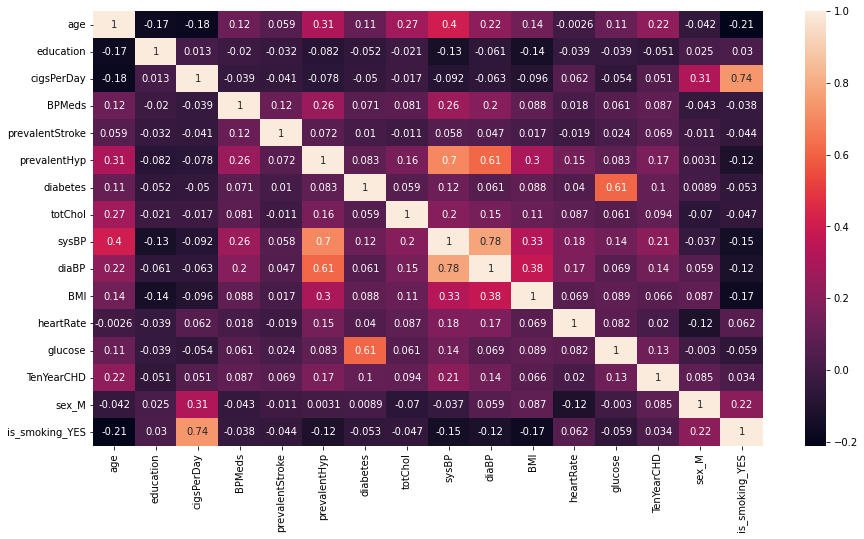

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

**Grouping columns for better understanding:**
There are many columns in this dataset. Some of them can be combined to give a better column which actually gives out better and precise information, which would also impact the prediction in a positive way

**Smoke level**
At first we can combine the is_smoking and cigsPerDay column. If a person has cigsPerDay value as something greater than 0, then it obviously means he is a smoker. In that case the column is_smoking would be of no value.So combine both of these columns into a single column which would be an ordinal column called SmokeLevel that contains the level of smoking for each person

In [22]:
def smoke_level(cpd: float):
  """A function that returns the Smoking level
     by taking cigarettes per day as an input."""
  if cpd==0:                    #Non smoker
    return 1
  elif cpd>0 and cpd<=10:       #Smoker with more than 0 and less than 10 cigs per day
    return 2
  elif cpd>10 and cpd<=20:      #Smoker with more than 10 and less than 20 cigs per day 
    return 3
  elif cpd>20 and cpd<=30:      #Smoker with more than 20 and less than 30 cigs per day
    return 4
  elif cpd>30 and cpd<=40:      #Smoker with more than 30 and less than 40 cigs per day
    return 5        
  else:                         #Smoker with more than 40 cigs per day
    return 6  

In [23]:

#Creating the SmokeLevel column
data['SmokeLevel'] = data['cigsPerDay'].apply(lambda x: smoke_level(x))

In [24]:
#Removing columns upon whom grouping has been done
data.drop(columns={'is_smoking_YES','cigsPerDay'},axis=1,inplace=True)

In [25]:

#Checking if the new column creation has worked
data.head()

,age,education,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_M,SmokeLevel
0,64,2,0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,0,2
1,36,4,0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,1,1
2,46,1,0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,0,2
3,50,1,0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,1,3
4,64,1,0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,0,4


BPLevel:
Next, I will combine the "sysBP" and "diaBP" columns to create a new column called the "BPLevel".

Before diving into this step let us have a look at what are the BP levels defined by the American heart association

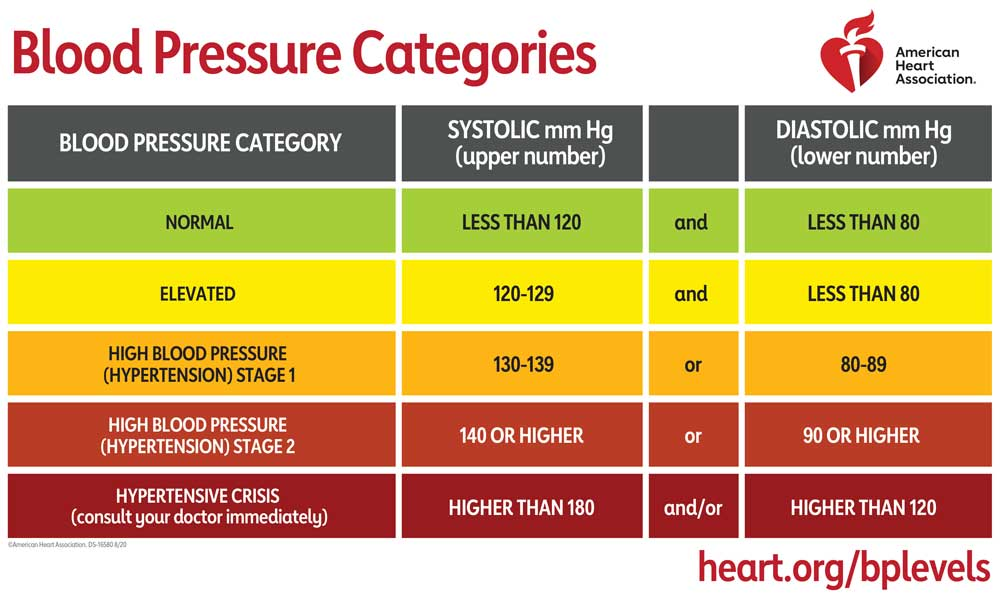

In [26]:
def BPLevel_assigner(s: float,d:float):
  """A function that returns the Blood Pressure level by taking the 
     Systolic blood pressure and Diastolic blood pressure as inputs"""
  if s<120 or d<80:                               #Normal level
    return 1
  elif (s>=120 and s<130) or d<80:                #Elevated level
    return 2
  elif (s>129 and s<140) or (d>79 and d<90):       #High BP stage 1
    return 3
  elif (s>139 and s<180) or (d<89 and d<120):      #High BP stage 2
    return 4
  elif s>179 or d>119:                             #Hypertensive crisis
    return 5       

In [27]:

#Creating the BPLevel column
data['BPLevel'] = data.apply(lambda x: BPLevel_assigner(x['sysBP'],x['diaBP']),axis=1)

In [28]:

#Removing columns upon whom grouping has been done
data.drop(columns={'sysBP','diaBP'},axis=1,inplace=True)

In [29]:

#Checking if the BPLevel column is created properly
data.head()

,age,education,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,sex_M,SmokeLevel,BPLevel
0,64,2,0,0,0,0,221.0,25.38,90.0,80.0,1,0,2,3
1,36,4,0,0,1,0,212.0,29.77,72.0,75.0,0,1,1,4
2,46,1,0,0,0,0,250.0,20.35,88.0,94.0,0,0,2,1
3,50,1,0,0,1,0,233.0,28.26,68.0,94.0,1,1,3,3
4,64,1,0,0,0,0,241.0,26.42,70.0,77.0,0,0,4,3


DiabetesLevel:
Atlast, I'll convert the "glucose" column to a column called "DiabetesLevel". This would enable us to remove the glucose column and the diabetes column.

Let's have a look at the different Diabetes levels according to different glucose levels
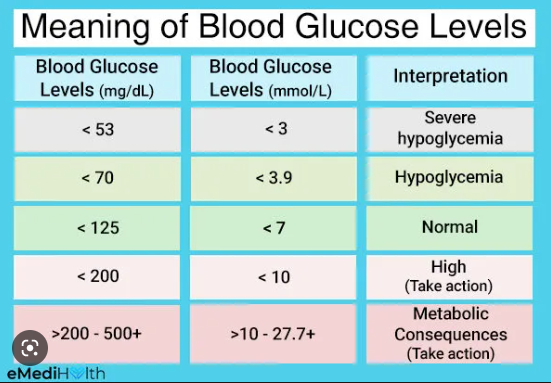

In [30]:
def DiabetesLevel_assigner(g:float):
  """A function that returns the DiabetesLevel
     by taking blood glucose levels as an input."""
  if g<53:                      #Severe Hypoglycemia
    return 1
  elif g>52 and g<70:           #Hypoglycemia
    return 2 
  elif g>69 and g<125:          #Normal
    return 3
  elif g>124 and g<200:         #Pre Diabetic
    return 4
  elif g>199:                   #Severe Diabetes
    return 5  

In [31]:
#Creating the Diabetes Level column
data['DiabetesLevel'] = data['glucose'].apply(lambda x: DiabetesLevel_assigner(x))

In [32]:

#Removing columns upon whom grouping has been done
data.drop(columns={'diabetes','glucose'},axis=1,inplace=True)

In [33]:

#Checking if the DiabetesLevel column has been created properly 
data.head()

,age,education,BPMeds,prevalentStroke,prevalentHyp,totChol,BMI,heartRate,TenYearCHD,sex_M,SmokeLevel,BPLevel,DiabetesLevel
0,64,2,0,0,0,221.0,25.38,90.0,1,0,2,3,3
1,36,4,0,0,1,212.0,29.77,72.0,0,1,1,4,3
2,46,1,0,0,0,250.0,20.35,88.0,0,0,2,1,3
3,50,1,0,0,1,233.0,28.26,68.0,1,1,3,3,3
4,64,1,0,0,0,241.0,26.42,70.0,0,0,4,3,3


Checking Correlation

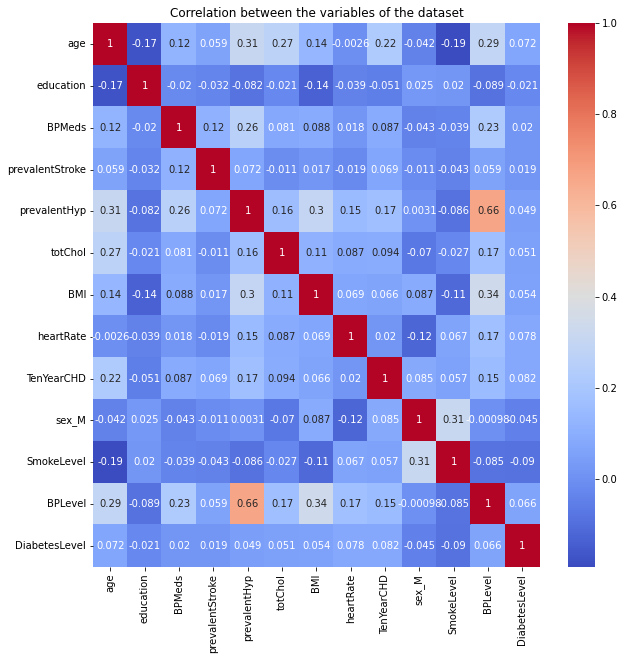

In [34]:
#Plotting correlation matrix using sns.heatmap()
corr_matrix = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation between the variables of the dataset")
plt.show()
     

As we can see, for majority of the variables there is no high correlation. But, we can also see that there is high correlation between "prevalentHyp" and "BPLevel". Practically speaking there is a direct relation between the two medically and therefore we can remove one of them. I'll remove the "prevalentHyp" column.

In [35]:

#Removing the prevalentHyp column to reduce correlation
data.drop('prevalentHyp',axis=1,inplace=True)
     

In [36]:
data.head()

,age,education,BPMeds,prevalentStroke,totChol,BMI,heartRate,TenYearCHD,sex_M,SmokeLevel,BPLevel,DiabetesLevel
0,64,2,0,0,221.0,25.38,90.0,1,0,2,3,3
1,36,4,0,0,212.0,29.77,72.0,0,1,1,4,3
2,46,1,0,0,250.0,20.35,88.0,0,0,2,1,3
3,50,1,0,0,233.0,28.26,68.0,1,1,3,3,3
4,64,1,0,0,241.0,26.42,70.0,0,0,4,3,3


In [37]:

#Removing useless columns
data.drop(columns={'BPMeds','prevalentStroke'},axis=1,inplace=True)

In [38]:
#moving the target variable to the end for simplicity
df1 = data.pop('TenYearCHD') # remove column TenYearCHD and store it in df1

data['TenYearCHD']=df1 # add TenYearCHD series as a 'new' column.

In [39]:
# indepenent variables
independent= data.columns[:-1].tolist()
independent

['age',
 'education',
 'totChol',
 'BMI',
 'heartRate',
 'sex_M',
 'SmokeLevel',
 'BPLevel',
 'DiabetesLevel']

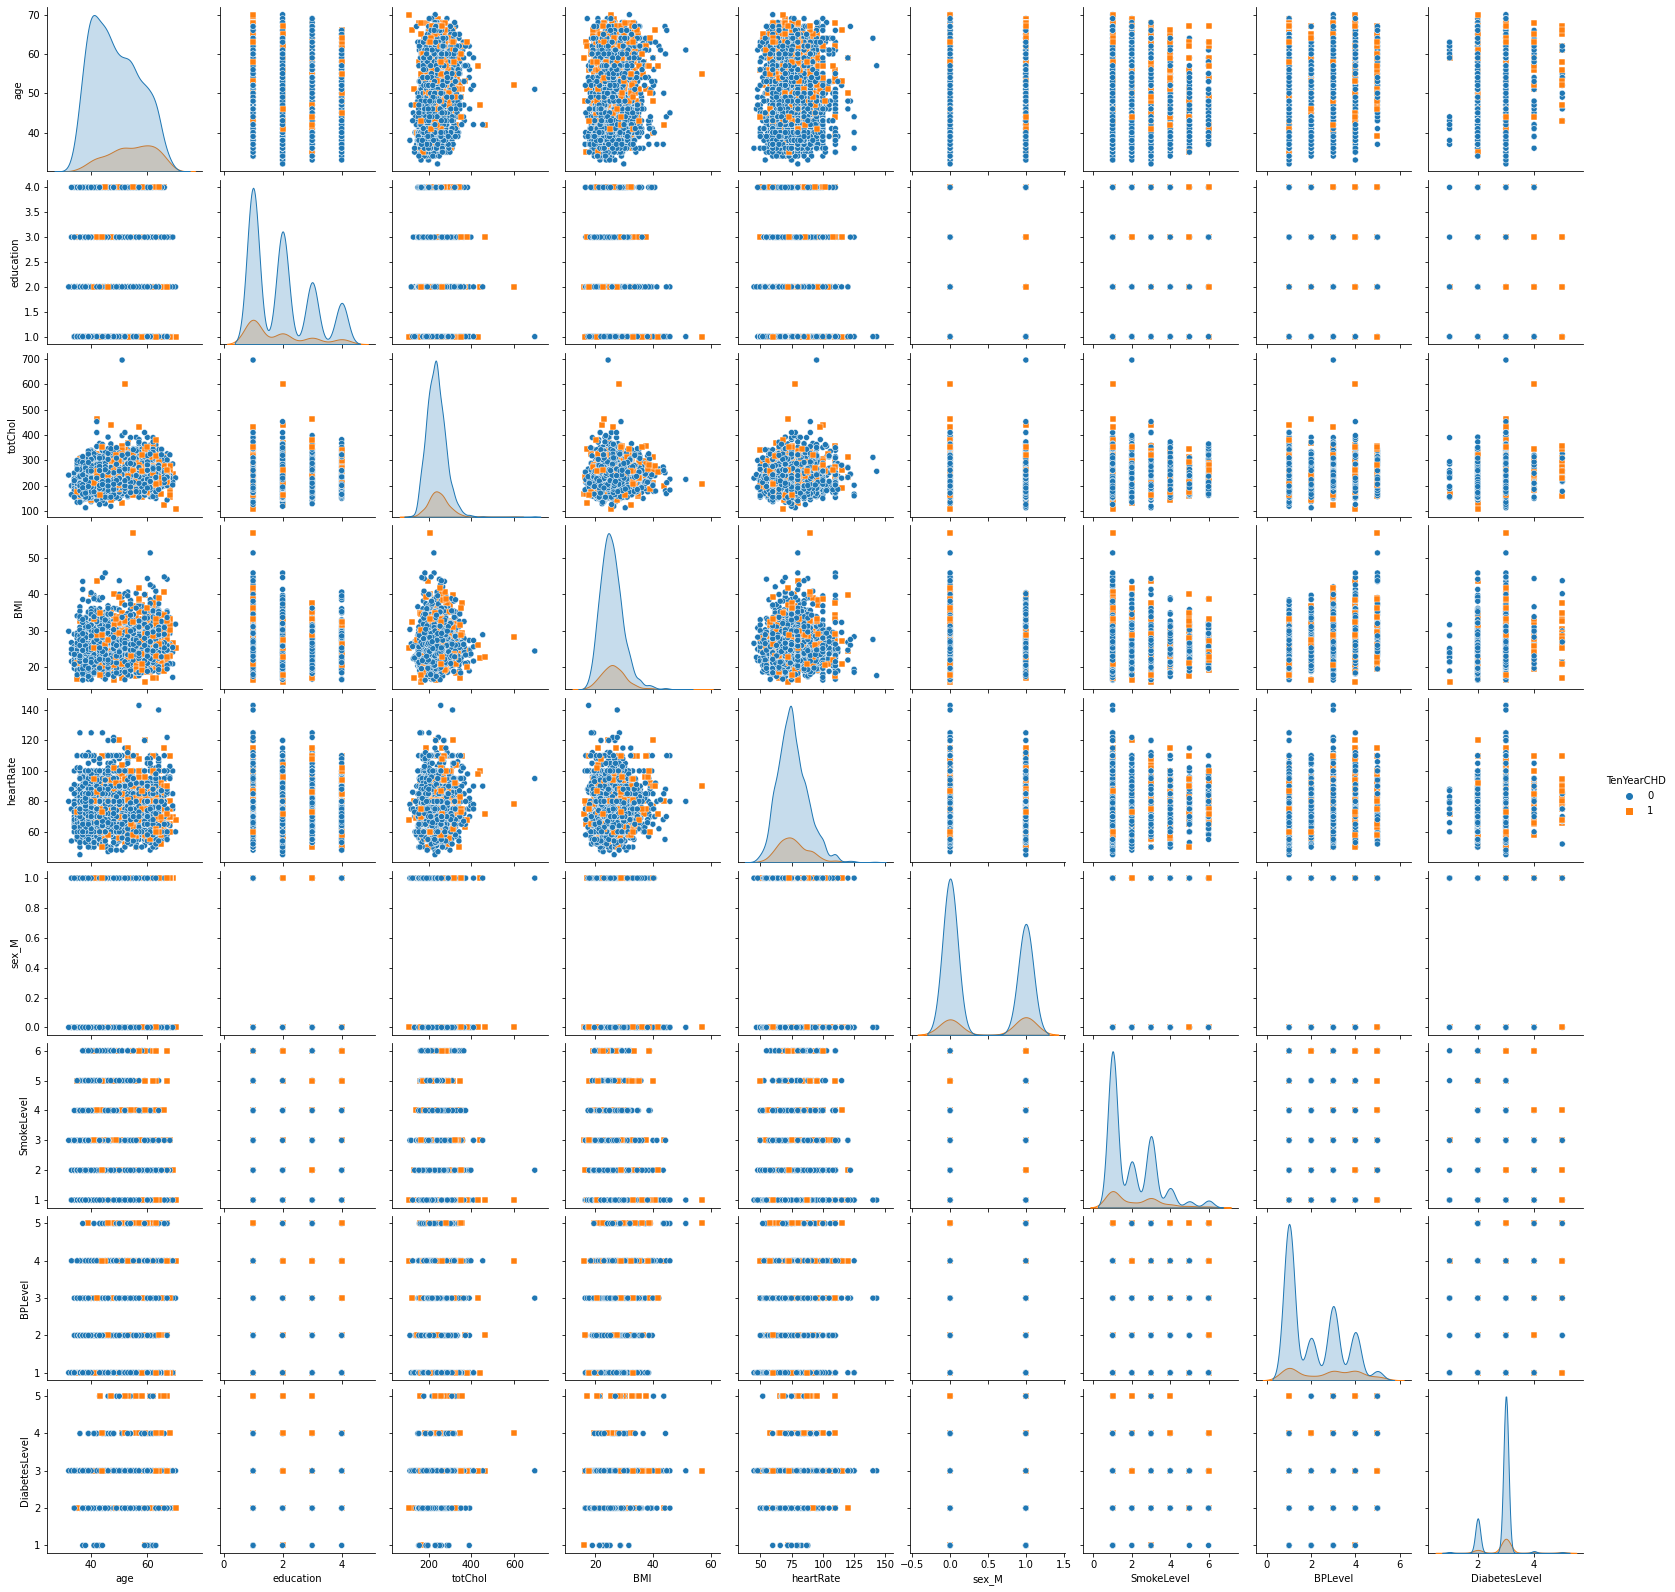

In [76]:
sns.pairplot(data, hue = 'TenYearCHD', markers=["o", "s"], vars = independent)

**Prediction**

Train-test split

In [40]:
X = data[independent]
y = data.iloc[:,-1]

In [41]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))

Before OverSampling, counts of label '1': 511
Before OverSampling, counts of label '0': 2879 



since there is an imbalanced data, we have to do oversamplig

In [43]:
# Convert the imbalance data to balanced one
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_smote, y_smote = sm.fit_resample(X, y.ravel())

In [44]:
print('After OverSampling, the shape of train_X: {}'.format(X_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_smote.shape))

After OverSampling, the shape of train_X: (5758, 9)
After OverSampling, the shape of train_y: (5758,) 



In [45]:
print("After OverSampling, counts of label '1': {}".format(sum(y_smote == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_smote == 0)))

After OverSampling, counts of label '1': 2879
After OverSampling, counts of label '0': 2879


In [46]:
data2 = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)

In [47]:
data2.columns=data.columns

In [48]:
data2.head()

,age,education,totChol,BMI,heartRate,sex_M,SmokeLevel,BPLevel,DiabetesLevel,TenYearCHD
0,64,2,221.0,25.38,90.0,0,2,3,3,1
1,36,4,212.0,29.77,72.0,1,1,4,3,0
2,46,1,250.0,20.35,88.0,0,2,1,3,0
3,50,1,233.0,28.26,68.0,1,3,3,3,1
4,64,1,241.0,26.42,70.0,0,4,3,3,0


In [49]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5758 entries, 0 to 5757
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            5758 non-null   int64  
 1   education      5758 non-null   int64  
 2   totChol        5758 non-null   float64
 3   BMI            5758 non-null   float64
 4   heartRate      5758 non-null   float64
 5   sex_M          5758 non-null   uint8  
 6   SmokeLevel     5758 non-null   int64  
 7   BPLevel        5758 non-null   int64  
 8   DiabetesLevel  5758 non-null   int64  
 9   TenYearCHD     5758 non-null   int64  
dtypes: float64(3), int64(6), uint8(1)
memory usage: 410.6 KB


In [50]:
X_new = data2[independent]
y_new= data2.iloc[:,-1]
X_new.head()

,age,education,totChol,BMI,heartRate,sex_M,SmokeLevel,BPLevel,DiabetesLevel
0,64,2,221.0,25.38,90.0,0,2,3,3
1,36,4,212.0,29.77,72.0,1,1,4,3
2,46,1,250.0,20.35,88.0,0,2,1,3
3,50,1,233.0,28.26,68.0,1,3,3,3
4,64,1,241.0,26.42,70.0,0,4,3,3


In [51]:
# Splitting the dataset into the Training set and Test set
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=33, stratify = y_new)

In [52]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [53]:
print("The shape of train dataset :")
print(X_train.shape)

print("\n The shape of test dataset :")
print(X_test.shape)

The shape of train dataset :
(4606, 9)

 The shape of test dataset :
(1152, 9)


In [54]:
print("Distribution of classes of dependent variable in train :")
print(y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(y_test.value_counts())

Distribution of classes of dependent variable in train :
1    2303
0    2303
Name: TenYearCHD, dtype: int64

 Distribution of classes of dependent variable in test :
1    576
0    576
Name: TenYearCHD, dtype: int64


Hyperparameter tuning & Model Fitting

Random Forest Classifier

In [55]:
# Hyperparameter tuning

# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Fit the object to train dataset
#classifier.fit(X_train, y_train)

In [56]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [57]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc', verbose=2)

In [58]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_leaf=40, min_samples_split=50,
                       n_estimators=80)

In [60]:
rf_optimal_model = rf_grid.best_estimator_

In [61]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 80}

In [62]:
# Making predictions on train and test data

rf_train_class_preds = rf_optimal_model.predict(X_train)
rf_test_class_preds = rf_optimal_model.predict(X_test)


# Get the probabilities on train and test
rf_train_preds = rf_optimal_model.predict_proba(X_train)[:,1]
rf_test_preds = rf_optimal_model.predict_proba(X_test)[:,1]

In [63]:
train_preds = np.where(rf_train_preds > 0.5, 1, 0)
test_preds = np.where(rf_test_preds > 0.5, 1, 0)

In [64]:
len(train_preds)

4606

In [65]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,precision_score, recall_score, f1_score,classification_report,roc_curve

In [66]:
# Calculating accuracy,f1_score, recall, precision on train and test
rf_train_accuracy = accuracy_score(y_train,rf_train_class_preds)
rf_test_accuracy = accuracy_score(y_test,rf_test_class_preds)

rf_train_precision_score = precision_score(y_train,rf_train_class_preds)
rf_test_precision_score = precision_score(y_test,rf_test_class_preds)

rf_train_recall_score = recall_score(y_train,rf_train_class_preds)
rf_test_recall_score = recall_score(y_test,rf_test_class_preds)

rf_train_f1_score = f1_score(y_train,rf_train_class_preds)
rf_test_f1_score = f1_score(y_test,rf_test_class_preds)


print("The accuracy on train dataset is", rf_train_accuracy)
print("The accuracy on test dataset is", rf_test_accuracy)

The accuracy on train dataset is 0.7162396873643074
The accuracy on test dataset is 0.7057291666666666


In [67]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train,rf_train_class_preds)
test_cm = confusion_matrix(y_test,rf_test_class_preds )

In [68]:
train_cm

array([[1521,  782],
       [ 525, 1778]])

In [69]:
test_cm

array([[384, 192],
       [147, 429]])

In [70]:
# Get the roc_auc score for train and test dataset
rf_train_auc = roc_auc_score(y_train,train_preds)
rf_test_auc = roc_auc_score(y_test,test_preds)

In [71]:
rf_train_auc

0.7162396873643074

In [72]:
rf_test_auc

0.7057291666666666

Plot confusion matrix

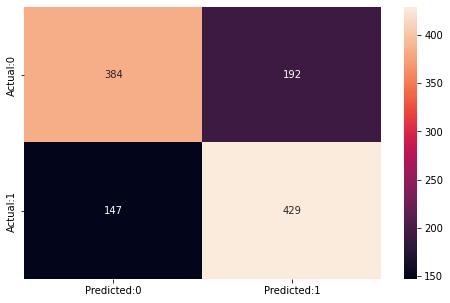

In [73]:
cm=confusion_matrix(y_test,test_preds)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')

In [74]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.72      0.67      0.69       576
           1       0.69      0.74      0.72       576

    accuracy                           0.71      1152
   macro avg       0.71      0.71      0.71      1152
weighted avg       0.71      0.71      0.71      1152



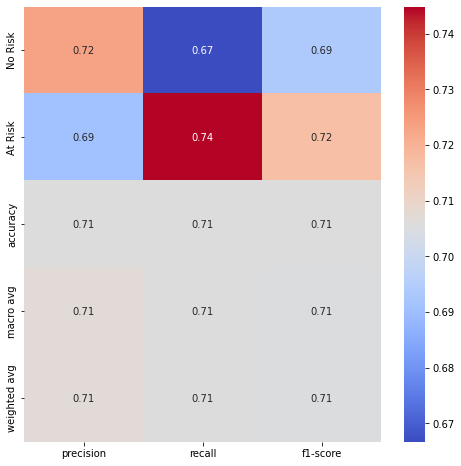

In [75]:
labels=np.arange(2)                                                    #To store the classes[0,1]
target_names = ['No Risk', 'At Risk']
clf_report=classification_report(y_test,test_preds,labels=labels,target_names=target_names,output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T,annot=True,cmap='coolwarm')  

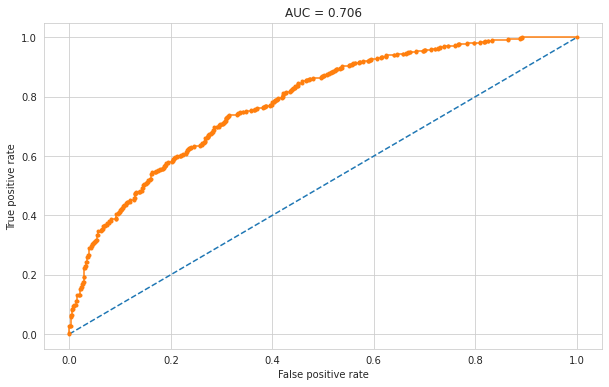

In [76]:
# ROC curve and AUC 
probs = rf_optimal_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(rf_test_auc,3)}")
plt.show()

# 2. Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}


# Create an instance of the RandomForestClassifier
log_model = LogisticRegression()

# Grid search
log_grid = GridSearchCV(estimator=log_model,
                       param_grid = params,
                       cv = 5, verbose=2, scoring='roc_auc')
log_grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ..........C=0.01, class_weight=balanced, penalty=l1; total time=   0.0s
[CV] END ..........C=0.01, class_weight=balanced, penalty=l1; total time=   0.0s
[CV] END ..........C=0.01, class_weight=balanced, penalty=l1; total time=   0.0s
[CV] END ..........C=0.01, class_weight=balanced, penalty=l1; total time=   0.0s
[CV] END ..........C=0.01, class_weight=balanced, penalty=l1; total time=   0.0s
[CV] END ..........C=0.01, class_weight=balanced, penalty=l2; total time=   0.0s
[CV] END ..........C=0.01, class_weight=balanced, penalty=l2; total time=   0.0s
[CV] END ..........C=0.01, class_weight=balanced, penalty=l2; total time=   0.0s
[CV] END ..........C=0.01, class_weight=balanced, penalty=l2; total time=   0.0s
[CV] END ..........C=0.01, class_weight=balanced, penalty=l2; total time=   0.2s
[CV] END ..............C=0.01, class_weight=None, penalty=l1; total time=   0.0s
[CV] END ..............C=0.01, class_weight=Non

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=2)

In [79]:
log_grid.best_estimator_

LogisticRegression(C=0.01)

In [80]:
log_optimal_model = log_grid.best_estimator_

In [81]:
log_grid.best_params_

{'C': 0.01, 'class_weight': None, 'penalty': 'l2'}

In [82]:
# Making predictions on train and test data

train_class_preds = log_optimal_model.predict(X_train)
test_class_preds = log_optimal_model.predict(X_test)


# # Get the probabilities on train and test
# log_train_preds = log_optimal_model.predict_proba(X_train)[:,1]
# log_test_preds = log_optimal_model.predict_proba(X_test)[:,1]

In [84]:
# train_preds_log = np.where(log_train_preds > 0.5, 1, 0)
# test_preds_log = np.where(log_train_preds > 0.5, 1, 0)

In [87]:
# Calculating accuracy,f1_score, recall, precision on train and test
log_train_accuracy = accuracy_score(y_train,train_class_preds)
log_test_accuracy = accuracy_score(y_test,test_class_preds)

log_train_precision_score = precision_score(y_train,train_class_preds)
log_test_precision_score = precision_score(y_test,test_class_preds)

log_train_recall_score = recall_score(y_train,train_class_preds)
log_test_recall_score = recall_score(y_test,test_class_preds)

log_train_f1_score = f1_score(y_train,train_class_preds)
log_test_f1_score = f1_score(y_test,test_class_preds)

print("The accuracy on train dataset is", log_train_accuracy)
print("The accuracy on test dataset is", log_test_accuracy)

The accuracy on train dataset is 0.6621797655232305
The accuracy on test dataset is 0.6536458333333334


In [88]:
# Get the confusion matrices for train and test
log_train_cm = confusion_matrix(y_train,train_class_preds)
log_test_cm = confusion_matrix(y_test,test_class_preds )

In [89]:
log_train_cm

array([[1462,  841],
       [ 715, 1588]])

In [90]:
log_test_cm

array([[365, 211],
       [188, 388]])

In [91]:
# Get the roc_auc score for train and test dataset
log_train_auc = roc_auc_score(y_train,log_train_preds)
log_test_auc = roc_auc_score(y_test,test_class_preds)

In [92]:
log_train_auc

0.7045093441336217

In [93]:
log_test_auc

0.6536458333333334

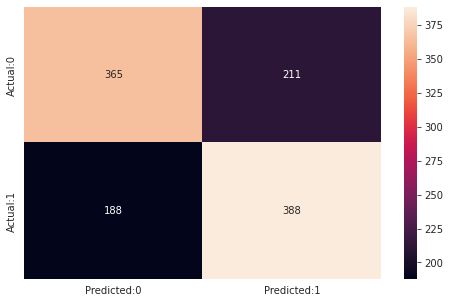

In [94]:
cm=confusion_matrix(y_test,test_class_preds)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')

In [95]:
print(classification_report(y_test,test_class_preds))

              precision    recall  f1-score   support

           0       0.66      0.63      0.65       576
           1       0.65      0.67      0.66       576

    accuracy                           0.65      1152
   macro avg       0.65      0.65      0.65      1152
weighted avg       0.65      0.65      0.65      1152



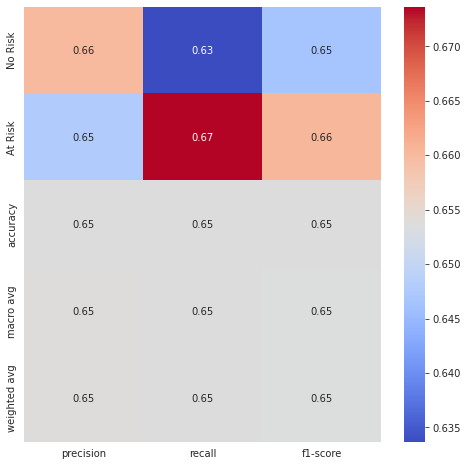

In [96]:
labels=np.arange(2)                                                    #To store the classes[0,1]
target_names = ['No Risk', 'At Risk']
clf_report_log=classification_report(y_test,test_class_preds,labels=labels,target_names=target_names,output_dict=True)
sns.heatmap(pd.DataFrame(clf_report_log).iloc[:-1, :].T,annot=True,cmap='coolwarm')  

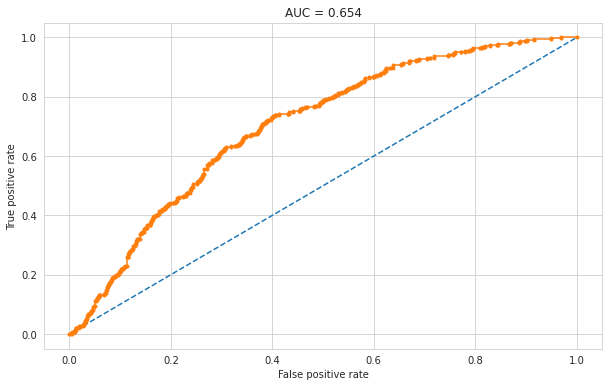

In [97]:
# ROC curve and AUC 
probs = log_optimal_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_test_auc,3)}")
plt.show()

# 3. XGB Classifier

In [98]:
# Hyperparameter tuning

# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the XGBClassifier
xgb_model = XGBClassifier()

# Grid search
xgb_grid = GridSearchCV(estimator=xgb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

xgb_grid.fit(X_train,y_train)

In [100]:
xgb_grid.best_estimator_

XGBClassifier(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [101]:
xgb_optimal_model = xgb_grid.best_estimator_

In [102]:
xgb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [116]:
# Making predictions on train and test data

train_class_preds_xgb = xgb_optimal_model.predict(X_train)
test_class_preds_xgb = xgb_optimal_model.predict(X_test)



In [117]:
# Calculating accuracy,f1_score, recall, precision on train and test
xgb_train_accuracy = accuracy_score(y_train,train_class_preds_xgb)
xgb_test_accuracy = accuracy_score(y_test,test_class_preds_xgb)

xgb_train_precision_score = precision_score(y_train,train_class_preds_xgb)
xgb_test_precision_score = precision_score(y_test,test_class_preds_xgb)

xgb_train_recall_score = recall_score(y_train,train_class_preds_xgb)
xgb_test_recall_score = recall_score(y_test,test_class_preds_xgb)

xgb_train_f1_score = f1_score(y_train,train_class_preds_xgb)
xgb_test_f1_score = f1_score(y_test,test_class_preds_xgb)

print("The accuracy on train dataset is", xgb_train_accuracy)
print("The accuracy on test dataset is", xgb_test_accuracy)

The accuracy on train dataset is 0.973295701259227
The accuracy on test dataset is 0.8489583333333334


In [120]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train,train_class_preds_xgb)
test_cm = confusion_matrix(y_test,test_class_preds_xgb )

In [121]:
train_cm

array([[2257,   46],
       [  77, 2226]])

In [122]:
test_cm

array([[487,  89],
       [ 85, 491]])

In [110]:
# Get the roc_auc score for train and test dataset
xgb_train_auc = roc_auc_score(y_train,train_preds)
xgb_test_auc = roc_auc_score(y_test,test_preds)

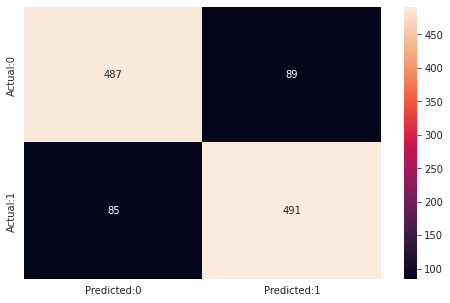

In [114]:
cm=confusion_matrix(y_test,test_class_preds)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')

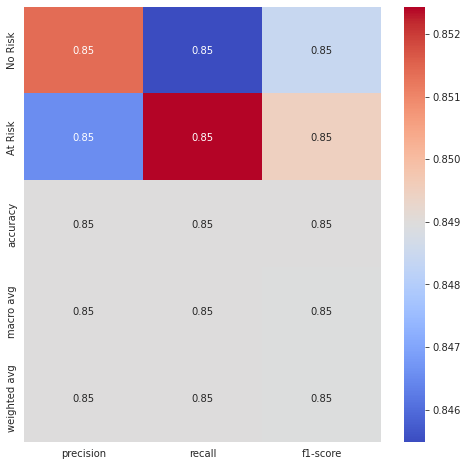

In [125]:
labels=np.arange(2)                                                    #To store the classes[0,1]
target_names = ['No Risk', 'At Risk']
clf_report_xgb=classification_report(y_test,test_class_preds_xgb,labels=labels,target_names=target_names,output_dict=True)
sns.heatmap(pd.DataFrame(clf_report_xgb).iloc[:-1, :].T,annot=True,cmap='coolwarm')  

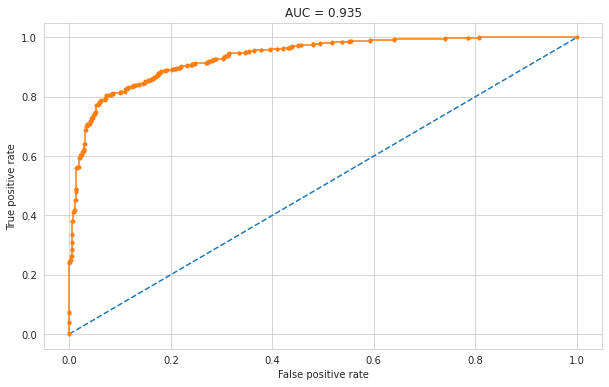

In [126]:
# ROC curve and AUC 
probs = xgb_optimal_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(xgb_test_auc,3)}")
plt.show()

# Comparison of Models

In [127]:
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':log_test_accuracy, 'recall':log_test_recall_score, 'precision ':log_test_precision_score,'AUC':log_test_auc, 'F1 score':log_test_f1_score},
    "Random Forest Classifier":{'Accuracy':rf_test_accuracy,'recall':rf_test_recall_score, 'precision ':rf_test_precision_score, 'AUC':rf_test_auc, 'F1 score':rf_test_f1_score},
    "XGB Classifier":{'Accuracy':xgb_test_accuracy,'recall':xgb_test_recall_score, 'precision ':xgb_test_precision_score, 'AUC':xgb_test_auc, 'F1 score':xgb_test_f1_score}})

In [128]:
comparison=comparison.round(2)
comparison

,Logistic regression,Random Forest Classifier,XGB Classifier
Accuracy,0.65,0.71,0.85
recall,0.67,0.74,0.85
precision,0.65,0.69,0.85
AUC,0.65,0.71,0.93
F1 score,0.66,0.72,0.85


Text(0, 0.5, 'Y-axis')

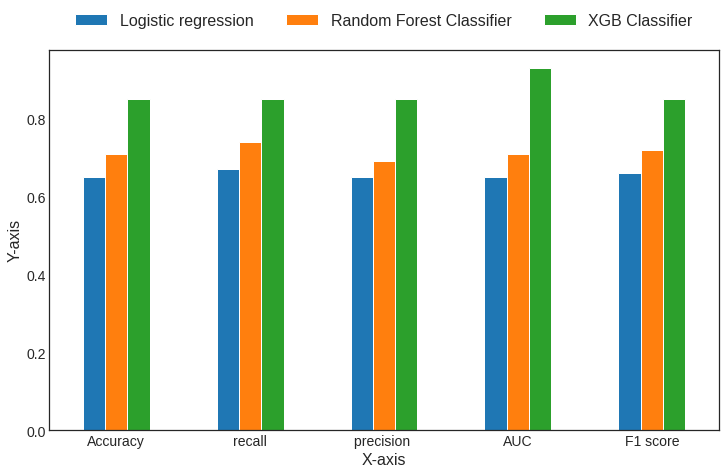

In [129]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')
ax = comparison.plot.bar(figsize=[12, 7])
ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower center", ncol=3, fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.tick_params(axis='both', labelsize=14)
ax.set_xlabel("X-axis", fontsize=16)
ax.set_ylabel("Y-axis", fontsize=16)

It could be seen from the comparison that the performance of the XGB Classifier is the best

# Feature Importance of the best classifier

Text(0.5, 1.0, 'Features importance')

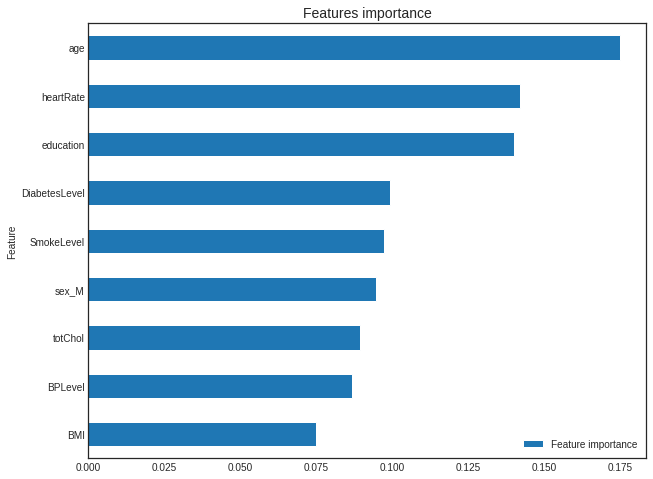

In [130]:
fea_df = pd.DataFrame({'Feature': independent, 'Feature importance': xgb_optimal_model.feature_importances_})
fea_df = fea_df.sort_values(by='Feature importance')

figure, ax = plt.subplots(figsize = (10,8))
fea_df.plot.barh(x='Feature',y='Feature importance', ax=ax)
plt.title('Features importance',fontsize=14)